   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


C:\Users\Silvia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        0  
1        2  
2        0  
3        2  
4        0  


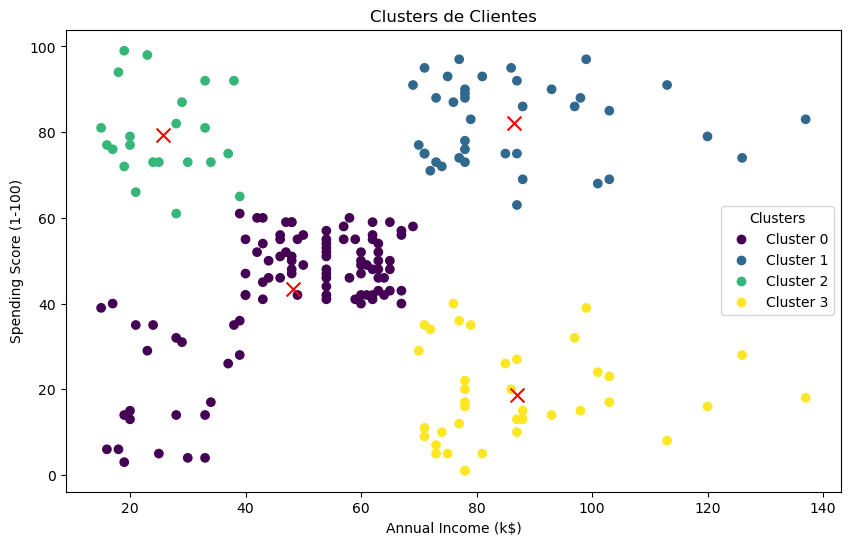

[[48.16831683 43.3960396 ]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [87.         18.63157895]]
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0         201    Male   23                  58                      67   
1         202  Female   45                 120                      32   
2         203  Female   31                  78                      80   
3         204    Male   22                  40                      54   
4         205  Female   41                  75                      50   

   Cluster  
0        0  
1        3  
2        1  
3        0  
4        0  
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 48.168317               43.396040
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 87.000000               18.631579
        Annual Income (k$)  Spending Score (1-100)
Genre

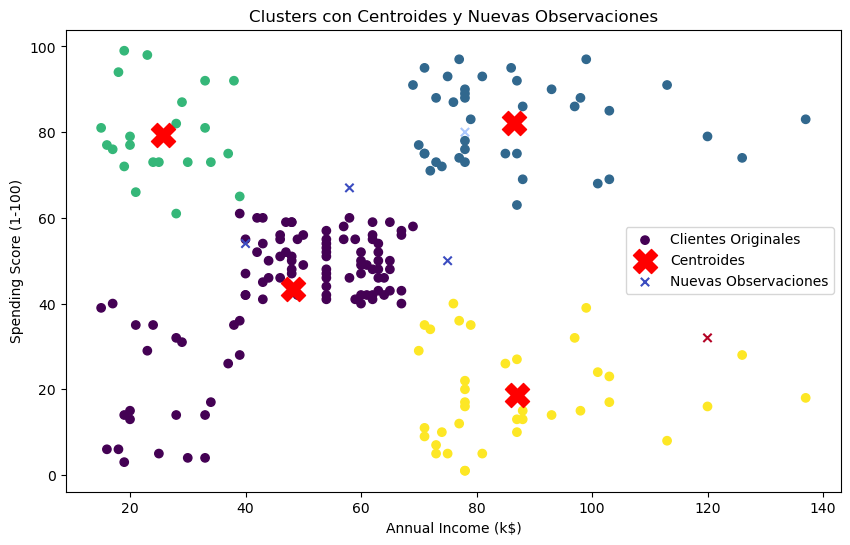

In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar el dataset (asegúrate de que la ruta al archivo es correcta)
data = pd.read_csv(r'C:\Users\Silvia\OneDrive\Escritorio\ML y politicas publicas\Mall_Customers.csv')

print(data.head())  # Para inspeccionar las primeras filas del DataFrame

# Selección de características para clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Definir el modelo k-means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
#kmeans = KMeans(n_clusters=5, random_state=42)

# Ajustar el modelo a los datos
kmeans.fit(X)

# Obtener las etiquetas predichas
y_predict = kmeans.labels_

# Agregar los clusters al DataFrame original
data['Cluster'] = y_predict

print(data.head())  # Para ver mi data como quedo con la nueva variable


# Visualizar los clusters con divisiones claras y leyenda
plt.figure(figsize=(10, 6))

# Dibujar los puntos de cada cluster con un color distinto
scatter = plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_predict, cmap='viridis')

# Crear una leyenda con los números de los clusters
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(4)], title='Clusters')

# Añadir líneas divisorias que separen los clusters
# Esto se puede hacer utilizando los límites de los centroides para ver la división entre los clusters
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='x', color='red', s=100, label=f'Centroid {i}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters de Clientes')
plt.show(block=True)

print(kmeans.cluster_centers_) # analizar la posicion de los centroides para clasificar de manera adecuada los clientes


# Nuevas observaciones
new_customers = pd.DataFrame({
    'CustomerID': [201, 202, 203, 204, 205],
    'Genre': ['Male', 'Female', 'Female', 'Male', 'Female'],
    'Age': [23, 45, 31, 22, 41],
    'Annual Income (k$)': [58, 120, 78, 40, 75],
    'Spending Score (1-100)': [67, 32, 80, 54, 50]
})

# Selección de las características relevantes para el clustering
X_new = new_customers[['Annual Income (k$)', 'Spending Score (1-100)']]

# Predecir los clusters para las nuevas observaciones
new_clusters = kmeans.predict(X_new)

# Agregar los clusters a las nuevas observaciones
new_customers['Cluster'] = new_clusters

# Mostrar las nuevas observaciones con los clusters asignados
print(new_customers)

# Calcular estadísticas descriptivas para cada cluster
cluster_stats = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].groupby('Cluster').mean()
print(cluster_stats)

gender_stats = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Genre']].groupby('Genre').mean() 
print(gender_stats)

# Calcular estadísticas descriptivas para cada cluster con las nuevas observaciones

new_cluster_stats = new_customers[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].groupby('Cluster').mean()
print(new_cluster_stats)


# Visualización de clusters y centroides
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_predict, cmap='viridis', label='Clientes Originales')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroides')
plt.scatter(X_new['Annual Income (k$)'], X_new['Spending Score (1-100)'], c=new_clusters, cmap='coolwarm', label='Nuevas Observaciones', marker='x')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters con Centroides y Nuevas Observaciones')
plt.legend()
# Guardar el gráfico en un archivo
#plt.savefig('clusters_con_nuevas_observaciones.png', format='png', dpi=300)
plt.savefig('C:/Users/Silvia/OneDrive/Escritorio/clusters_con_nuevas_observaciones.png', format='png', dpi=300)

# Mostrar el gráfico en pantalla
plt.show()

#plt.show()


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


C:\Users\Silvia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


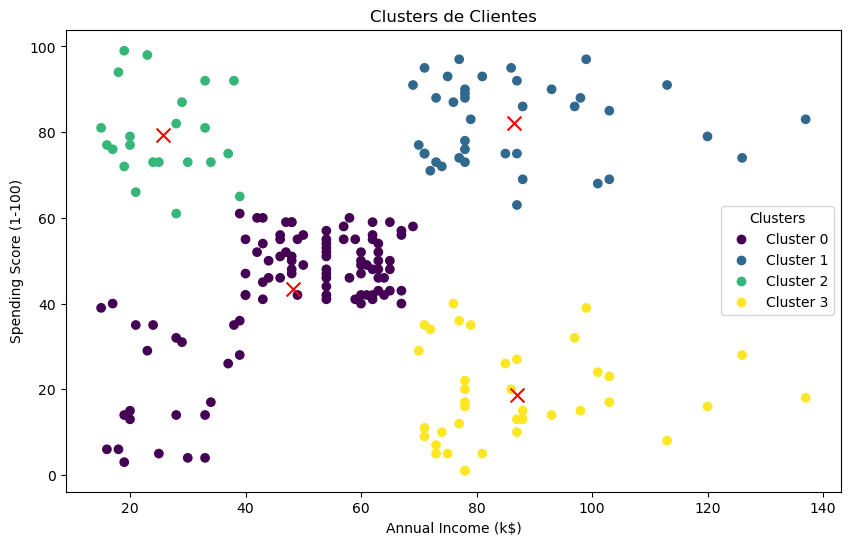

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0         201    Male   23                  58                      67   
1         202  Female   45                 120                      32   
2         203  Female   31                  78                      80   
3         204    Male   22                  40                      54   
4         205  Female   41                  75                      50   

   Cluster  
0        0  
1        3  
2        1  
3        0  
4        0  
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 48.168317               43.396040
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 87.000000               18.631579
        Annual Income (k$)  Spending Score (1-100)
Genre                                             
Female           59.250000               51.526786
Male        

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar el dataset (asegúrate de que la ruta al archivo es correcta)
data = pd.read_csv(r'C:\Users\Silvia\OneDrive\Escritorio\ML y politicas publicas\Mall_Customers.csv')

print(data.head())  # Para inspeccionar las primeras filas del DataFrame

# Selección de características para clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Definir el modelo k-means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
#kmeans = KMeans(n_clusters=5, random_state=42)

# Ajustar el modelo a los datos
kmeans.fit(X)

# Obtener las etiquetas predichas
y_predict = kmeans.labels_

# Agregar los clusters al DataFrame original
data['Cluster'] = y_predict

# Visualizar los clusters con divisiones claras y leyenda
plt.figure(figsize=(10, 6))

# Dibujar los puntos de cada cluster con un color distinto
scatter = plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_predict, cmap='viridis')

# Crear una leyenda con los números de los clusters
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(4)], title='Clusters')

# Añadir líneas divisorias que separen los clusters
# Esto se puede hacer utilizando los límites de los centroides para ver la división entre los clusters
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='x', color='red', s=100, label=f'Centroid {i}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters de Clientes')
plt.show(block=True)

# Nuevas observaciones
new_customers = pd.DataFrame({
    'CustomerID': [201, 202, 203, 204, 205],
    'Genre': ['Male', 'Female', 'Female', 'Male', 'Female'],
    'Age': [23, 45, 31, 22, 41],
    'Annual Income (k$)': [58, 120, 78, 40, 75],
    'Spending Score (1-100)': [67, 32, 80, 54, 50]
})

# Selección de las características relevantes para el clustering
X_new = new_customers[['Annual Income (k$)', 'Spending Score (1-100)']]

# Predecir los clusters para las nuevas observaciones
new_clusters = kmeans.predict(X_new)

# Agregar los clusters a las nuevas observaciones
new_customers['Cluster'] = new_clusters

# Mostrar las nuevas observaciones con los clusters asignados
print(new_customers)

# Calcular estadísticas descriptivas para cada cluster
cluster_stats = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].groupby('Cluster').mean()
print(cluster_stats)

gender_stats = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Genre']].groupby('Genre').mean() 
print(gender_stats)


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


C:\Users\Silvia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


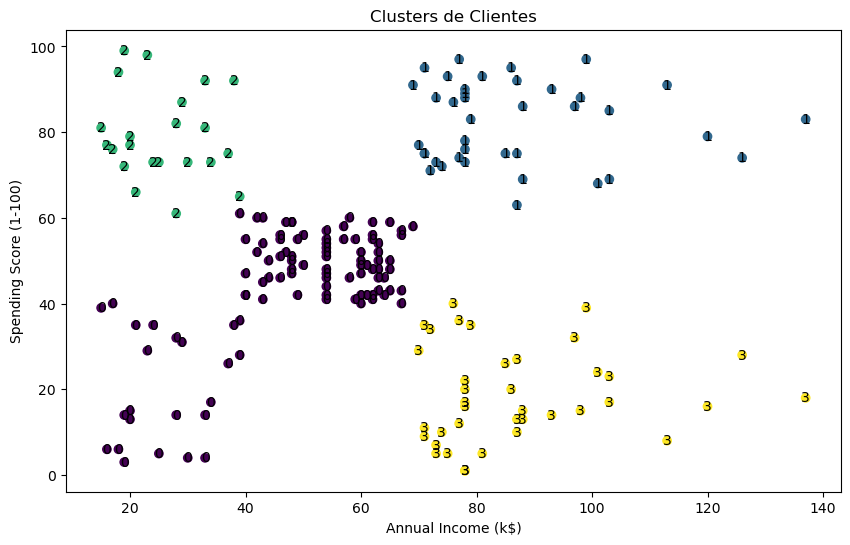

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0         201    Male   23                  58                      67   
1         202  Female   45                 120                      32   
2         203  Female   31                  78                      80   
3         204    Male   22                  40                      54   
4         205  Female   41                  75                      50   

   Cluster  
0        0  
1        3  
2        1  
3        0  
4        0  
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 48.168317               43.396040
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 87.000000               18.631579
        Annual Income (k$)  Spending Score (1-100)
Genre                                             
Female           59.250000               51.526786
Male        

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Cargar el dataset (asegúrate de que la ruta al archivo es correcta)
data = pd.read_csv(r'C:\Users\Silvia\OneDrive\Escritorio\ML y politicas publicas\Mall_Customers.csv')

print(data.head())  # Para inspeccionar las primeras filas del DataFrame

# Selección de características para clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Definir el modelo k-means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Ajustar el modelo a los datos
kmeans.fit(X)

# Obtener las etiquetas predichas
y_predict = kmeans.labels_

# Agregar los clusters al DataFrame original
data['Cluster'] = y_predict

# Visualizar los clusters con números
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_predict, cmap='viridis')

# Añadir los números de los clusters al gráfico
for i in range(len(X)):
    plt.text(X['Annual Income (k$)'][i], X['Spending Score (1-100)'][i], str(y_predict[i]), 
             color='black', fontsize=10, ha='center', va='center')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters de Clientes')
plt.show(block=True)

# Nuevas observaciones
new_customers = pd.DataFrame({
    'CustomerID': [201, 202, 203, 204, 205],
    'Genre': ['Male', 'Female', 'Female', 'Male', 'Female'],
    'Age': [23, 45, 31, 22, 41],
    'Annual Income (k$)': [58, 120, 78, 40, 75],
    'Spending Score (1-100)': [67, 32, 80, 54, 50]
})

# Selección de las características relevantes para el clustering
X_new = new_customers[['Annual Income (k$)', 'Spending Score (1-100)']]

# Predecir los clusters para las nuevas observaciones
new_clusters = kmeans.predict(X_new)

# Agregar los clusters a las nuevas observaciones
new_customers['Cluster'] = new_clusters

# Mostrar las nuevas observaciones con los clusters asignados
print(new_customers)

# Calcular estadísticas descriptivas para cada cluster
cluster_stats = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].groupby('Cluster').mean()
print(cluster_stats)

gender_stats = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Genre']].groupby('Genre').mean() 
print(gender_stats)


C:\Users\Silvia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Silvia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Silvia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Silvia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

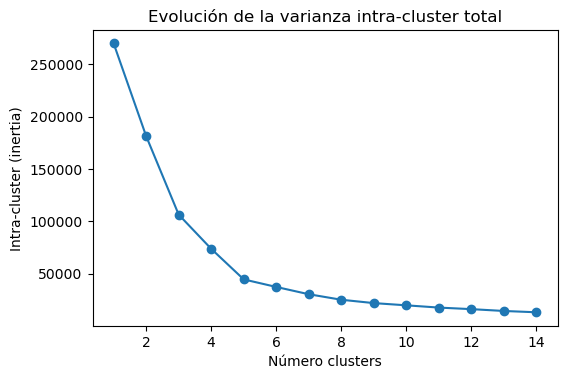

In [3]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans_ = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 25, 
                        random_state = 123
                    )
    modelo_kmeans_.fit(X)
    inertias.append(modelo_kmeans_.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

C:\Users\Silvia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Silvia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Silvia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Silvia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

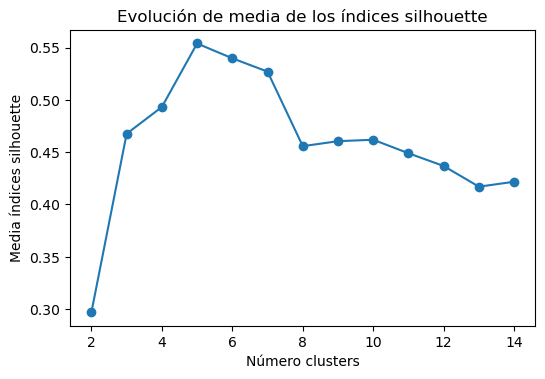

In [5]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans__ = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 25, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans__.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')
plt.show()